<a href="https://colab.research.google.com/github/manogna1105/Zomato-Data-Analysis/blob/main/Zomato_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Zomato Data Analysis Using Python**

Python and its following libraries are used to analyze Zomato data.

* **Numpy-** With Numpy arrays, complex computations are executed quickly, and large calculations are handled efficiently.

* **Matplotlib-** It has a wide range of features for creating high-quality plots, charts, histograms, scatter plots, and more.

* **Pandas-** The library simplifies the loading of data frames into 2D arrays and provides functions for performing multiple analysis tasks in a single operation.

* **Seaborn-** It offers a high-level interface for creating visually appealing and informative statistical graphics.

**Step 1: Import necessary Python libraries.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2: Create the data frame.**

In [3]:
dataframe = pd.read_csv("/content/Zomato-data-.csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [4]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


To obtain a summary of the data frame, you can use the following code:-

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Let's explore the listed_in (type) column.

<ipython-input-9-ab69f8e605ad>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe['listed_in(type)'], palette="magma")  # Or any other method


Text(0.5, 0, 'Type of restaurant')

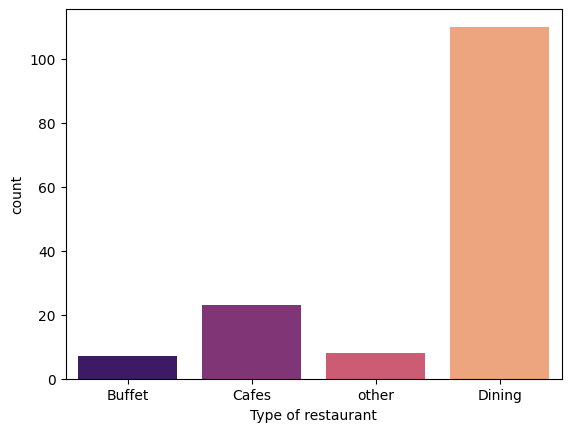

In [9]:
sns.countplot(x=dataframe['listed_in(type)'], palette="magma")  # Or any other method
plt.xlabel("Type of restaurant")

**Conclusion:** The majority of the restaurants fall into the dining category.

Text(0, 0.5, 'Votes')

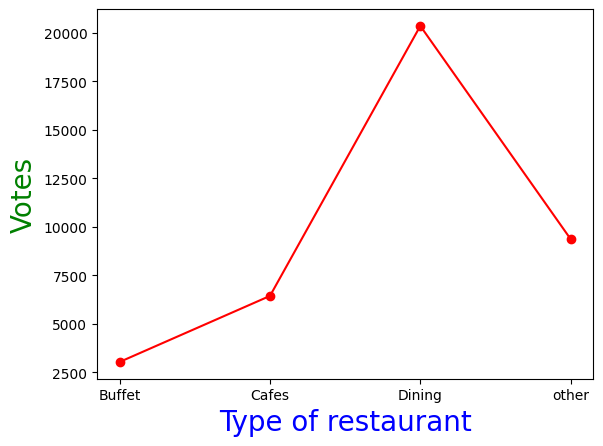

In [20]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='red', marker='o')
plt.xlabel('Type of restaurant', c='blue', size=20)
plt.ylabel('Votes', c='green', size=20)

**Conclusion:** Dining restaurants are preferred by a larger number of individuals.

Now we will determine the restaurant's name that received the maximum votes based on a given dataframe.

In [21]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


Let's explore the online_order column.

<ipython-input-23-e932c45e1632>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe['online_order'], palette="magma")


<Axes: xlabel='online_order', ylabel='count'>

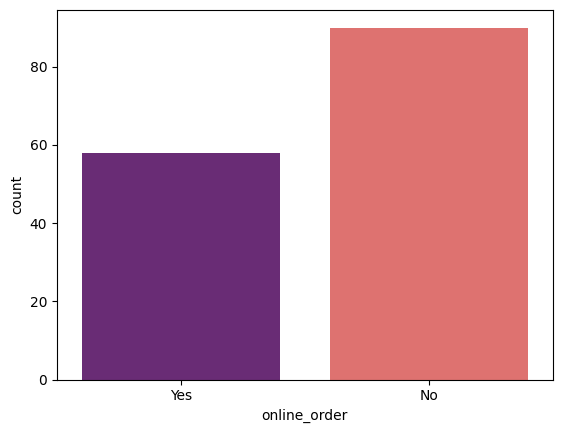

In [23]:

sns.countplot(x=dataframe['online_order'], palette="magma")

**Conclusion:** This suggests that a majority of the restaurants do not accept online orders.

Let's explore the rate column.

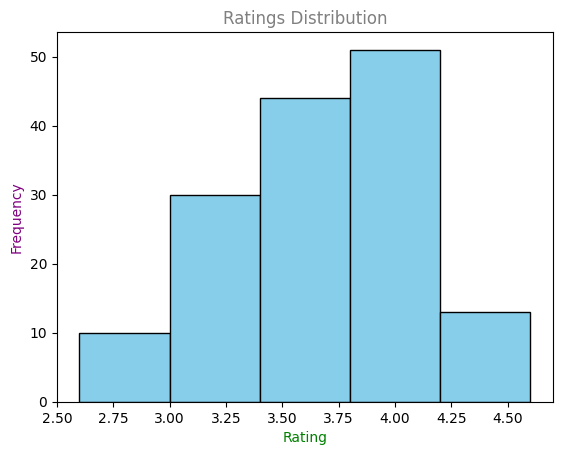

In [25]:
plt.hist(dataframe['rate'], bins=5, color='skyblue', edgecolor='black')  # Added color and edgecolor
plt.title('Ratings Distribution', color='gray')  # Added color to the title
plt.xlabel('Rating', color='green')  # Added x-axis label with color
plt.ylabel('Frequency', color='purple')  # Added y-axis label with color
plt.show()

**Conclusion:** The majority of restaurants received ratings ranging from 3.5 to 4.

Let's explore the approx_cost(for two people) column.

<ipython-input-30-f976dca670c6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=couple_data, palette="Set1")


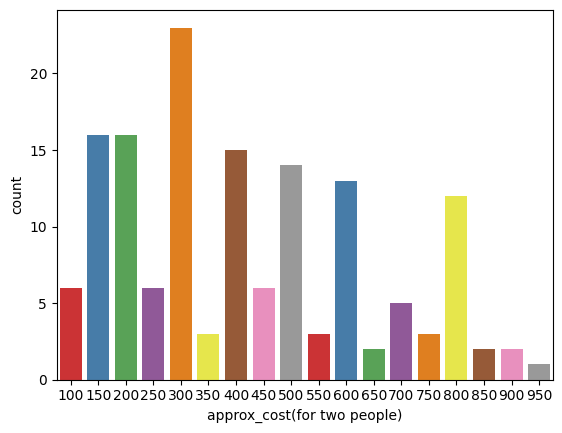

In [30]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data, palette="Set1")
plt.show()  # To display the plot

***Conclusion:*** The majority of couples prefer restaurants with an approximate cost of 300 rupees.

Now we will examine whether online orders receive higher ratings than offline orders.

<ipython-input-32-79c96a2a6c91>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'online_order', y = 'rate', data = dataframe, palette="Set1") # Add palette argument for colors


<Axes: xlabel='online_order', ylabel='rate'>

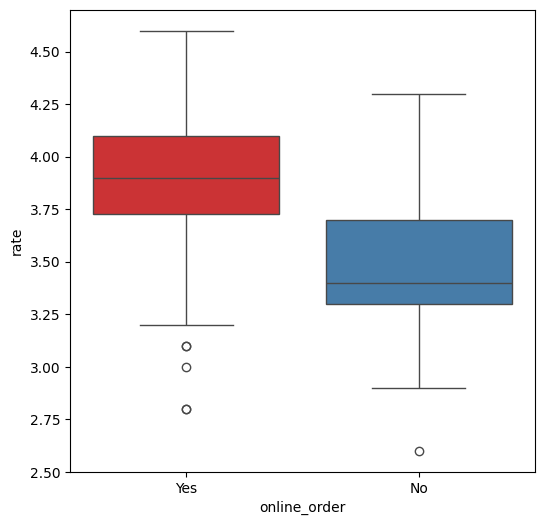

In [32]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe, palette="Set1") # Add palette argument for colors

**CONCLUSION:** Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

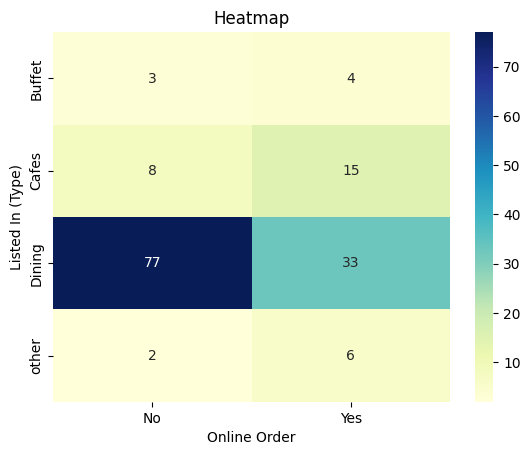

In [42]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

**CONCLUSION:** Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.